In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from pyvenn import venn
from pyteomics import mztab
import os
import re

In [3]:
%%R
data_folder = '../../datasets/TMT/PXD007683/'
setwd(data_folder)

In [4]:
quantms_tmt = pd.read_csv("./TMTResults/quantms/PXD007683-TMT.sdrf_openms_design_msstats_in.csv", sep=',', header=0)
quantms_tmt = quantms_tmt[-(quantms_tmt['ProteinName'].str.contains("DECOY_") | (quantms_tmt['ProteinName'].str.contains("CONT")))]
print(len(set(quantms_tmt['ProteinName'])))
quantms_tmt.head()

9415


,RetentionTime,ProteinName,PeptideSequence,Charge,Channel,Condition,BioReplicate,Run,Mixture,TechRepMixture,Fraction,Intensity,Reference
0,7835.607841,sp|P55011|S12A2_HUMAN,.(TMT6plex)AAAAAAAAAAAAAAAGAGAGAK(TMT6plex),3,1,SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;...,1,1_1_1,1,1_1,1,188745.4,a05058.mzML_controllerType=0 controllerNumber=...
1,7835.607841,sp|P55011|S12A2_HUMAN,.(TMT6plex)AAAAAAAAAAAAAAAGAGAGAK(TMT6plex),3,2,SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;...,2,1_1_1,1,1_1,1,183611.9,a05058.mzML_controllerType=0 controllerNumber=...
2,7835.607841,sp|P55011|S12A2_HUMAN,.(TMT6plex)AAAAAAAAAAAAAAAGAGAGAK(TMT6plex),3,3,SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;...,3,1_1_1,1,1_1,1,194053.5,a05058.mzML_controllerType=0 controllerNumber=...
3,7835.607841,sp|P55011|S12A2_HUMAN,.(TMT6plex)AAAAAAAAAAAAAAAGAGAGAK(TMT6plex),3,10,SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%...,10,1_1_1,1,1_1,1,190708.3,a05058.mzML_controllerType=0 controllerNumber=...
4,7835.607841,sp|P55011|S12A2_HUMAN,.(TMT6plex)AAAAAAAAAAAAAAAGAGAGAK(TMT6plex),3,11,SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%...,11,1_1_1,1,1_1,1,199489.8,a05058.mzML_controllerType=0 controllerNumber=...


In [5]:
quantms_lfq = pd.read_csv("./LFQResults/quantmsMBR/PXD007683-LFQ.sdrf_openms_design_msstats_in.csv", sep=',', header=0)
quantms_lfq = quantms_lfq[-(quantms_lfq['ProteinName'].str.contains("DECOY_") | (quantms_lfq['ProteinName'].str.contains("CONT")))]
print(len(set(quantms_lfq['ProteinName'])))
quantms_lfq.head()

8317


,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Intensity,Reference
0,sp|P55011|S12A2_HUMAN,AAAAAAAAAAAAAAAGAGAGAK,2,NaN,0,L,SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;...,1,1,14622250.0,a05191.mzML
1,sp|P55011|S12A2_HUMAN,AAAAAAAAAAAAAAAGAGAGAK,3,NaN,0,L,SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;...,1,1,33514050.0,a05191.mzML
2,sp|P55011|S12A2_HUMAN,AAAAAAAAAAAAAAAGAGAGAK,2,NaN,0,L,SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%...,10,10,25707450.0,a05201.mzML
3,sp|P55011|S12A2_HUMAN,AAAAAAAAAAAAAAAGAGAGAK,2,NaN,0,L,SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%...,11,11,19793070.0,a05202.mzML
4,sp|P55011|S12A2_HUMAN,AAAAAAAAAAAAAAAGAGAGAK,3,NaN,0,L,SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%...,11,11,50089690.0,a05202.mzML


In [6]:
MaxquantTMT = pd.read_csv("TMTResults/MaxQuant/proteinGroups.txt", sep='\t', header=0)
MaxquantTMT = MaxquantTMT[(MaxquantTMT['Reverse'] != "+") & (MaxquantTMT['Potential contaminant'] != "+")]
MaxquantTMT = MaxquantTMT[-(MaxquantTMT['Protein IDs'].str.contains("CON_") | (MaxquantTMT['Protein IDs'].str.contains("REV_")))]
print(len(set(MaxquantTMT['Majority protein IDs'])))
MaxquantTMT.head()

8486


C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
185,sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN,sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN,6;6,6;6,6;6,sp|P0DPI2|GAL3A_HUMAN Glutamine amidotransfera...,2,6,6,6,...,NaN,185,11893;20084;22685;38562;57129;60109,True;True;True;True;True;True,12635;21357;24115;41308;61028;64189,18253;30905;30906;34981;60446;88751;93617,18958;32178;32179;36422;62947;92377;97448,18958;32178;36422;62947;92377;97448,103,87
186,sp|A0A0B4J2F0|PIOS1_HUMAN,sp|A0A0B4J2F0|PIOS1_HUMAN,1,1,1,sp|A0A0B4J2F0|PIOS1_HUMAN Protein PIGBOS1 OS=H...,1,1,1,1,...,NaN,186,36603,True,39127,57320,59696,59696,104,43
187,sp|A0A2Z4LIS9|FXO3B_HUMAN;sp|Q9HBT8|Z286A_HUMA...,sp|A0A2Z4LIS9|FXO3B_HUMAN,3;1;1,1;1;1,1;1;1,sp|A0A2Z4LIS9|FXO3B_HUMAN Forkhead box protein...,3,3,1,1,...,NaN,187,37226;41074;50250,False;False;True,39886;43973;53680,58444;64309;77831,60858;66994;81050,60858;66994;81050,105,141
188,sp|A0AVF1|IFT56_HUMAN,sp|A0AVF1|IFT56_HUMAN,3,3,3,sp|A0AVF1|IFT56_HUMAN Intraflagellar transport...,1,3,3,3,...,NaN,188,7702;22921;41941,True;True;True,8171;24364;44884,11865;35391;65556,12304;36853;68295,12304;36853;68295,NaN,NaN
189,sp|A0AVT1|UBA6_HUMAN,sp|A0AVT1|UBA6_HUMAN,23,23,23,sp|A0AVT1|UBA6_HUMAN Ubiquitin-like modifier-a...,1,23,23,23,...,NaN,189,2369;6222;7111;18734;21329;24400;28431;30270;3...,True;True;True;True;True;True;True;True;True;T...,2494;6592;7550;19915;22688;22689;25930;30225;3...,3662;9642;10978;10979;10980;28712;28713;28714;...,3811;10008;11386;11387;11388;29870;29871;29872...,3811;10008;11388;29871;34268;39326;45977;48888...,106;107;108;109;110,32;69;492;844;985


In [7]:
len(set(MaxquantTMT['Majority protein IDs']).intersection(set(quantms_tmt['ProteinName'])))

8112

In [8]:
print(len(set(MaxquantTMT[-MaxquantTMT['Majority protein IDs'].str.contains("HUMAN")]["Majority protein IDs"])))
print(len(set(quantms_tmt[-quantms_tmt['ProteinName'].str.contains("HUMAN")]["ProteinName"])))
print(len(set(MaxquantTMT[-MaxquantTMT['Majority protein IDs'].str.contains("HUMAN")]["Majority protein IDs"]).intersection(set(quantms_tmt[-quantms_tmt['ProteinName'].str.contains("HUMAN")]["ProteinName"]))))


1238
1462
1151


In [9]:
MaxquantLFQMBR = pd.read_csv("LFQResults/myMaxQuantMBR/proteinGroups.txt", sep='\t', header=0)
MaxquantLFQMBR = MaxquantLFQMBR[(MaxquantLFQMBR['Reverse'] != "+") & (MaxquantLFQMBR['Potential contaminant'] != "+")]
MaxquantLFQMBR = MaxquantLFQMBR[-(MaxquantLFQMBR['Protein IDs'].str.contains("CON_") | (MaxquantLFQMBR['Protein IDs'].str.contains("REV_")))]
print(len(set(MaxquantLFQMBR['Majority protein IDs'])))
MaxquantLFQMBR.head()

7455


C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (121,122) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
148,sp|A0A024RBG1|NUD4B_HUMAN;sp|Q9NZJ9|NUDT4_HUMAN,sp|A0A024RBG1|NUD4B_HUMAN;sp|Q9NZJ9|NUDT4_HUMAN,4;3,2;1,2;1,sp|A0A024RBG1|NUD4B_HUMAN Diphosphoinositol po...,2,4,2,2,...,NaN,148,13210;29378;39416;43865,False;True;False;True,13757;30606;41468;46071,137958;137959;313507;313508;313509;313510;3135...,116780;263145;350370;387135;387136;387137;3871...,116780;263145;350370;387145,NaN,NaN
149,sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN,sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN,7;7,7;7,7;7,sp|P0DPI2|GAL3A_HUMAN Glutamine amidotransfera...,2,7,7,7,...,NaN,149,13169;17070;19268;24623;36332;37352;55958,True;True;True;True;True;True;True,13715;17780;17781;20065;25663;38228;39317;58734,137467;137468;137469;137470;137471;137472;1788...,116356;116357;116358;116359;151417;151418;1514...,116356;151440;171135;221009;323135;332657;494423,54,87
150,sp|P0DPI3|CENL2_HUMAN;sp|A0A0U1RR11|CENL1_HUMA...,sp|P0DPI3|CENL2_HUMAN;sp|A0A0U1RR11|CENL1_HUMA...,1;1;1,1;1;1,1;1;1,sp|P0DPI3|CENL2_HUMAN Centromere protein V-lik...,3,1,1,1,...,NaN,150,19968,True,20793,209832;209833;209834;209835;209836;209837;2098...,177729;177730;177731;177732;177733;177734;1777...,177729,NaN,NaN
151,sp|A0AVF1|IFT56_HUMAN,sp|A0AVF1|IFT56_HUMAN,2,2,2,sp|A0AVF1|IFT56_HUMAN Intraflagellar transport...,1,2,2,2,...,NaN,151,19466;45175,True;True,20271;47433,204339;476479;476480;476481;476482;476483;476484,173061;173062;397965,173062;397965,NaN,NaN
152,sp|A0AVT1|UBA6_HUMAN,sp|A0AVT1|UBA6_HUMAN,20,20,20,sp|A0AVT1|UBA6_HUMAN Ubiquitin-like modifier-a...,1,20,20,20,...,NaN,152,4946;5670;14510;15948;17390;18102;25672;34304;...,True;True;True;True;True;True;True;True;True;T...,5165;5919;15118;16622;18112;18851;18852;26748;...,52531;52532;52533;52534;52535;52536;52537;5253...,44341;44342;44343;44344;44345;44346;44347;5114...,44346;51148;128264;141186;154397;160924;230568...,55;56;57;58;59,56;492;844;985;992


In [10]:
len(set(MaxquantLFQMBR['Majority protein IDs']).intersection(set(quantms_lfq['ProteinName'])))

7099

In [11]:
print(len(set(MaxquantLFQMBR[-MaxquantLFQMBR['Majority protein IDs'].str.contains("HUMAN")]["Majority protein IDs"])))
print(len(set(quantms_lfq[-quantms_lfq['ProteinName'].str.contains("HUMAN")]["ProteinName"])))
print(len(set(MaxquantLFQMBR[-MaxquantLFQMBR['Majority protein IDs'].str.contains("HUMAN")]["Majority protein IDs"]).intersection(set(quantms_lfq[-quantms_lfq['ProteinName'].str.contains("HUMAN")]["ProteinName"]))))


938
1151
852


In [12]:
def remove_mod(pep_seq):
    pep_seq = pep_seq.replace(".", "")
    pep_seq = re.sub("\(.*?\)", "", pep_seq)
    return pep_seq

quantms_tmt_mztab = mztab.MzTab("./TMTResults/quantms/PXD007683-TMT.sdrf_openms_design_openms.mzTab")
quantms_tmt_pep =quantms_tmt_mztab.peptide_table
quantms_tmt_pep = quantms_tmt_pep[quantms_tmt_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1]
quantms_tmt_pep_unique = quantms_tmt_pep[quantms_tmt_pep["unique"] == 1]

quantms_lfq_mztab = mztab.MzTab("./LFQResults/quantmsMBR/PXD007683-LFQ.sdrf_openms_design_openms.mzTab")
quantms_lfq_pep =quantms_lfq_mztab.peptide_table
quantms_lfq_pep = quantms_lfq_pep[quantms_lfq_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1]
quantms_lfq_pep_unique = quantms_lfq_pep[quantms_lfq_pep["unique"] == 1]

print(len(set(quantms_tmt_pep_unique["sequence"])))
print(len(set(quantms_lfq_pep_unique["sequence"])))

MaxQuantTMTPeptide = pd.read_csv("TMTResults/MaxQuant/peptides.txt", sep='\t', header=0)
MaxQuantTMTPeptide = MaxQuantTMTPeptide[-(MaxQuantTMTPeptide['Proteins'].str.contains("CON_") | (MaxQuantTMTPeptide['Proteins'].str.contains("REV_")))]
MaxQuantTMTPeptide = MaxQuantTMTPeptide[MaxQuantTMTPeptide["Unique (Proteins)"] == "yes"]

MaxQuantLFQPeptide = pd.read_csv("LFQResults/myMaxQuantMBR/peptides.txt", sep='\t', header=0)
MaxQuantLFQPeptide = MaxQuantLFQPeptide[-(MaxQuantLFQPeptide['Proteins'].str.contains("CON_") | (MaxQuantLFQPeptide['Proteins'].str.contains("REV_")))]
MaxQuantLFQPeptide = MaxQuantLFQPeptide[MaxQuantLFQPeptide["Unique (Proteins)"] == "yes"]

print(len(set(MaxQuantTMTPeptide["Sequence"])))
print(len(set(MaxQuantLFQPeptide["Sequence"])))

print(len(set(MaxQuantTMTPeptide["Sequence"]).intersection(set(quantms_tmt_pep_unique["sequence"]))))
print(len(set(MaxQuantLFQPeptide["Sequence"]).intersection(set(quantms_lfq_pep_unique["sequence"]))))

77341
53214
57838
54473
55679
47237


In [13]:
print(len(set(quantms_tmt['ProteinName']).intersection(set(quantms_lfq["ProteinName"]))))
print(len(set(MaxquantLFQMBR['Majority protein IDs']).intersection(set(MaxquantTMT['Majority protein IDs']))))

7653
6695


# LFQ analysis

In [14]:
n_data = pd.DataFrame(None,columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4', 'Condition', "CV[%]", "Species"])


for condition in np.unique(quantms_lfq['Condition']):
    quantms_lfq_condition = quantms_lfq[quantms_lfq['Condition'] == condition]

    for protein in np.unique(quantms_lfq_condition['ProteinName']):
        t = quantms_lfq_condition[quantms_lfq_condition['ProteinName'] == protein]
        
        # sum intensity across BioRep1
        if condition == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house":
            BioRep1 = np.sum(t[t['Run'].isin([i for i in [1]])]['Intensity'])
            BioRep2 = np.sum(t[t['Run'].isin([i for i in [2]])]['Intensity'])
            BioRep3 = np.sum(t[t['Run'].isin([i for i in [3]])]['Intensity'])
            BioRep4 = np.NaN
        elif condition == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house":
            BioRep1 = np.sum(t[t['Run'].isin([i for i in [4]])]['Intensity'])
            BioRep2 = np.sum(t[t['Run'].isin([i for i in [5]])]['Intensity'])
            BioRep3 = np.sum(t[t['Run'].isin([i for i in [6]])]['Intensity'])
            BioRep4 = np.sum(t[t['Run'].isin([i for i in [7]])]['Intensity'])
        else:
            BioRep1 = np.sum(t[t['Run'].isin([i for i in [8]])]['Intensity'])
            BioRep2 = np.sum(t[t['Run'].isin([i for i in [9]])]['Intensity'])
            BioRep3 = np.sum(t[t['Run'].isin([i for i in [10]])]['Intensity'])
            BioRep4 = np.sum(t[t['Run'].isin([i for i in [11]])]['Intensity'])
        
        species = "Human" if "HUMAN" in protein else "Yeast"
        if BioRep1 == 0:
            BioRep1 = np.NaN
        if BioRep2 == 0:
            BioRep2 = np.NaN
        if BioRep3 == 0:
            BioRep3 = np.NaN
        if BioRep4 == 0:
            BioRep4 = np.NaN
            
        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4])
        n_data = n_data.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, 'BioRep4': BioRep4,
                       'Condition': condition, "CV[%]": 100 * (std / mean), "Species": species}, ignore_index=True)
        

In [15]:
quantms_lfq_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Log10(summed intensity)", "Species"])

# 2-fold change
for prot, group in n_data.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3"]]
    else:
        continue
    if t10.isnull().sum(axis=1).values[0] >=2 or t5.isnull().sum(axis=1).values[0] >=2:
        continue
    Log10summed_intensity = np.log10(np.nanmean(t5, axis=1)[0])
    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t5, axis=1)[0])
    quantms_lfq_pic = quantms_lfq_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                              "Species": group["Species"].values[0], "type":"2-fold change"}, ignore_index=True)
# 1.5 fold change
for prot, group in n_data.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if t5.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue
    Log10summed_intensity = np.log10(np.nanmean(t3, axis=1)[0])
    log2ratio = np.log2(np.nanmean(t5, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    quantms_lfq_pic = quantms_lfq_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                       "Species": group["Species"].values[0], "type": "1.5-fold change"}, ignore_index=True)
    
# 3 fold change
for prot, group in n_data.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3"]]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if t10.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue
    Log10summed_intensity = np.log10(np.nanmean(t3, axis=1)[0])
    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    quantms_lfq_pic = quantms_lfq_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                       "Species": group["Species"].values[0], "type": "3-fold change"}, ignore_index=True)

In [16]:
quantms_lfq_pic["tool"] = "quantms"

## Running with MSstats

In [207]:
%%R -w 800 -h 600

library('MSstats', warn.conflicts = F, quietly = T, verbose = F)
protein_expression = './LFQResults/quantmsMBR/protein_expression.csv'

raw.om <- read.csv('./LFQResults/quantmsMBR/PXD007683-LFQ.sdrf_openms_design_msstats_in.csv', header = TRUE, sep = ',')
raw.om <- raw.om[!grepl("DECOY", raw.om$ProteinName),]

raw.om <- OpenMStoMSstatsFormat(raw.om)
quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           remove50missing = TRUE,
                                           summaryMethod = 'TMP',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)


head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData
head(Protein.Expression)
write.csv(Protein.Expression, file=protein_expression, row.names=FALSE)

In [17]:
quantms_lfq_msstats = pd.read_csv("./LFQResults/quantmsMBR/protein_expression.csv", sep=',', index_col=None)

def BioRep_Con(RUN):
    if RUN == 1 or RUN == 4 or RUN == 8:
        return "BioRep1"
    elif RUN == 2 or RUN == 5 or RUN == 9:
        return "BioRep2"
    elif RUN == 3 or RUN == 6 or RUN == 10:
        return "BioRep3"
    else:
        return "BioRep4"
    
quantms_lfq_msstats["Intensities"] = 2**quantms_lfq_msstats["LogIntensities"]    
quantms_lfq_msstats["BioRep"] = quantms_lfq_msstats.apply(lambda x: BioRep_Con(x["RUN"]), axis=1)
quantms_msstats_cv_pic = quantms_lfq_msstats.pivot_table(index=["Protein","GROUP"], columns="BioRep", values="Intensities").reset_index()
quantms_msstats_cv_pic = quantms_msstats_cv_pic[["Protein", "GROUP", "BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
quantms_msstats_cv_pic.rename(columns={"Protein": "ProteinName","GROUP": "Condition"}, inplace=True)
quantms_msstats_cv_pic["Species"] = quantms_msstats_cv_pic.apply(lambda x: "Human" if "HUMAN" in x["ProteinName"] else "Yeast", axis=1)
quantms_msstats_cv_pic['CV[%]'] = quantms_msstats_cv_pic.apply(lambda x: np.nanstd(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) / np.nanmean(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) * 100, axis=1)
quantms_msstats_cv_pic["tool"] = "quantms+MSstats"

In [18]:
quantms_msstats_cv_pic.head()

BioRep,ProteinName,Condition,BioRep1,BioRep2,BioRep3,BioRep4,Species,CV[%],tool
0,sp|A0A024RBG1|NUD4B_HUMAN;sp|Q9NZJ9|NUDT4_HUMAN,SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;...,4.012543e+07,2.824122e+07,5.636188e+07,NaN,Human,27.722492,quantms+MSstats
1,sp|A0A024RBG1|NUD4B_HUMAN;sp|Q9NZJ9|NUDT4_HUMAN,SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%...,3.350837e+07,3.031891e+07,2.809021e+07,2.755213e+07,Human,7.848386,quantms+MSstats
2,sp|A0A024RBG1|NUD4B_HUMAN;sp|Q9NZJ9|NUDT4_HUMAN,SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;C...,4.243178e+07,6.555960e+07,2.843833e+07,5.274246e+07,Human,28.808431,quantms+MSstats
3,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;...,5.820597e+07,8.558939e+07,6.844600e+07,NaN,Human,15.968185,quantms+MSstats
4,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%...,1.162467e+08,9.543754e+07,8.219191e+07,8.049002e+07,Human,15.282009,quantms+MSstats


In [208]:
%%R

 

comparison1 <- matrix(c(1,0,-1), nrow=1)
comparison2 <- matrix(c(1,-1,0), nrow=1)
comparison3 <- matrix(c(0,-1,1), nrow=1)

comparison <- rbind(comparison1, comparison2, comparison3)
colnames(comparison) <- groups[order(as.numeric(groups))]
row.names(comparison) <- c("10vs5", "10vs3", "5vs3")

ResultComparison <- groupComparison(contrast.matrix=comparison, data=quantms.proposed)
head(ResultComparison$ComparisonResult)
write.csv(ResultComparison$ComparisonResult, './LFQResults/quantmsMBR/comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")


In [29]:
compar_res = pd.read_csv("./LFQResults/quantmsMBR/comparison_res.csv", sep=',', header=0)
compar_res = compar_res[compar_res["MissingPercentage"] <=0.5]
compar_res = compar_res[["Protein", "log2FC", "adj.pvalue", "pvalue", "Label"]]
compar_res.dropna(how="any", axis=0, inplace=True)
compar_res["Species"] = compar_res.apply(lambda x: "Human" if "HUMAN" in x["Protein"] else "Yeast", axis=1)
def convert_label(label):
    if label == "10vs5":
        return "2-fold change"
    elif label == "10vs3":
        return "3-fold change"
    else:
        return "1.5-fold change"
compar_res["Label"] = compar_res.apply(lambda x: convert_label(x["Label"]), axis=1)
compar_res["tool"] = "quantms+MSstats"
quantms_msstats_pic = compar_res[["Protein", "log2FC", "Label", "Species", "tool"]]

## MaxQuant

In [20]:
MaxQuant_pic = pd.DataFrame()

MaxquantLFQMBR_10 = MaxquantLFQMBR[['Protein IDs','Intensity 191', 'Intensity 192', 'Intensity 194']]
MaxquantLFQMBR_10.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
MaxquantLFQMBR_10["BioRep4"] = np.NaN
MaxquantLFQMBR_10['Condition'] = "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"

MaxquantLFQMBR_5 = MaxquantLFQMBR[['Protein IDs','Intensity 195', 'Intensity 196', 'Intensity 197', 'Intensity 198']]
MaxquantLFQMBR_5.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4']
MaxquantLFQMBR_5['Condition'] = "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"

MaxquantLFQMBR_3 = MaxquantLFQMBR[['Protein IDs','Intensity 199', 'Intensity 200', 'Intensity 201', 'Intensity 202']]
MaxquantLFQMBR_3.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4']
MaxquantLFQMBR_3['Condition'] = "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"

MaxQuant_pic = MaxQuant_pic.append(MaxquantLFQMBR_10, ignore_index=True)
MaxQuant_pic = MaxQuant_pic.append(MaxquantLFQMBR_5, ignore_index=True)
MaxQuant_pic = MaxQuant_pic.append(MaxquantLFQMBR_3, ignore_index=True)

MaxQuant_pic['Species'] = MaxQuant_pic.apply(lambda x: "Human" if "HUMAN" in x["ProteinName"] else "Yeast", axis=1)

MaxQuant_pic.replace(0, np.NaN, inplace=True)
MaxQuant_pic.dropna(subset=['BioRep1','BioRep2', 'BioRep3', 'BioRep4'], thresh=2, inplace=True)

MaxQuant_pic['CV[%]'] = MaxQuant_pic.apply(lambda x: np.nanstd(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) / np.nanmean(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) * 100, axis=1)

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [21]:
MaxquantLFQMBR_fc_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Species"])

# 2-fold change
for prot, group in MaxQuant_pic.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1",'BioRep2', 'BioRep3']]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][['BioRep1','BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
    
    if t10.isnull().sum(axis=1).values[0] >=2 or t5.isnull().sum(axis=1).values[0] >=2:
        continue
        
    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t5, axis=1)[0])
    MaxquantLFQMBR_fc_pic = MaxquantLFQMBR_fc_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "2-fold change"}, ignore_index=True)

# 3-fold change
for prot, group in MaxQuant_pic.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1",'BioRep2', 'BioRep3']]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][['BioRep1','BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
        
    if t10.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue
        
    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    MaxquantLFQMBR_fc_pic = MaxquantLFQMBR_fc_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "3-fold change"}, ignore_index=True)
    
# 3-fold change
for prot, group in MaxQuant_pic.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][["BioRep1",'BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][['BioRep1','BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
        
    if t5.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue
        
    log2ratio = np.log2(np.nanmean(t5, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    MaxquantLFQMBR_fc_pic = MaxquantLFQMBR_fc_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "1.5-fold change"}, ignore_index=True)

In [25]:
quantms_lfq_pic.rename(columns={"ProteinName": "Protein", "Log2(ratio)": "log2FC", "type": "Label"}, inplace=True)
quantms_lfq_pic = quantms_lfq_pic[["Protein", "log2FC", "Species", "Label", "tool"]]

MaxquantLFQMBR_fc_pic.rename(columns={"ProteinName": "Protein", "Log2(ratio)": "log2FC", "type": "Label"}, inplace=True)
MaxquantLFQMBR_fc_pic["tool"] = "MaxQuant"

1.5151515151515151
6886
                           log2FC
Species tool                     
Human   MaxQuant        -0.079886
        quantms         -0.074141
        quantms+MSstats -0.031217
Yeast   MaxQuant         0.659442
        quantms          0.434301
        quantms+MSstats  0.494249
Species  tool           
Human    MaxQuant           5651
         quantms            6209
         quantms+MSstats    6313
Yeast    MaxQuant            468
         quantms             677
         quantms+MSstats     655
dtype: int64
1.251
2
6893
                           log2FC
Species tool                     
Human   MaxQuant        -0.219939
        quantms         -0.118608
        quantms+MSstats -0.121422
Yeast   MaxQuant         1.195442
        quantms          1.022098
        quantms+MSstats  0.969256
Species  tool           
Human    MaxQuant           5582
         quantms            6183
         quantms+MSstats    6191
Yeast    MaxQuant            578
         quantms          

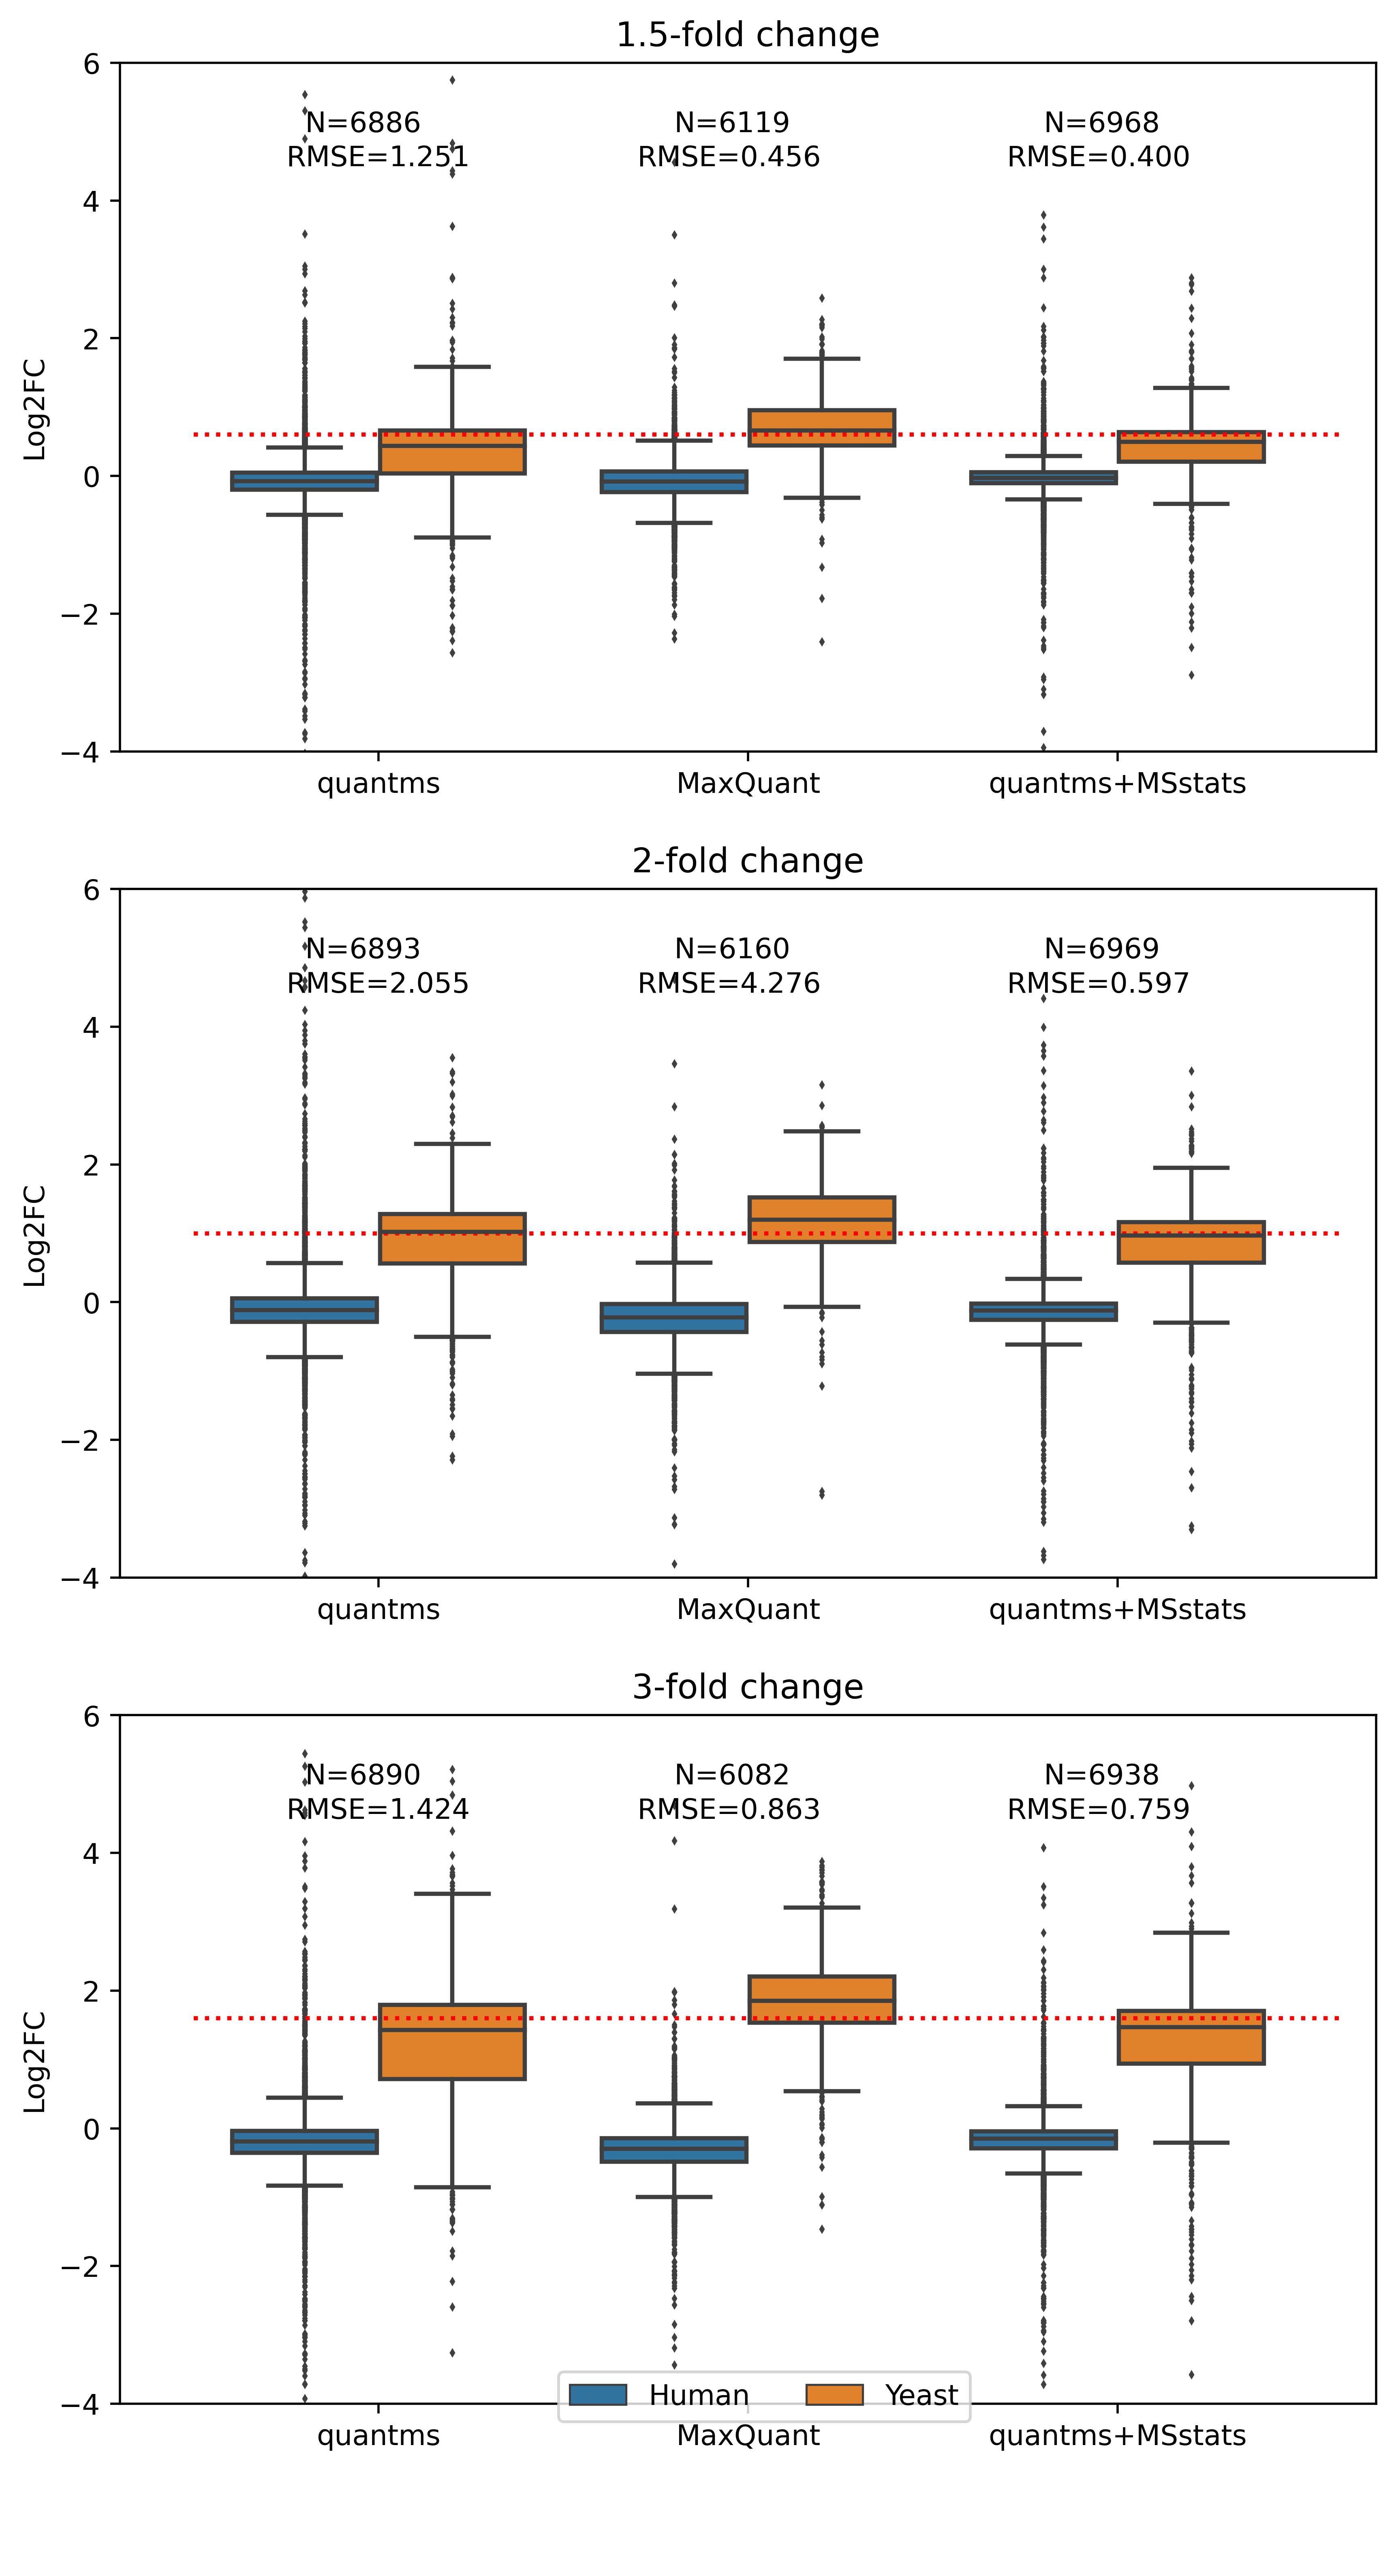

In [117]:
# LFQ_total_pic = quantms_lfq_pic.append(MaxquantLFQMBR_fc_pic, ignore_index=True).append(quantms_msstats_pic, ignore_index=True)
# LFQ_total_pic.replace("quantms with summend intensities", "quantms", inplace=True)
fig, ax= plt.subplots(figsize=(8,15),nrows=3, ncols=1, dpi=500)
i = 0
def cal_RMSE(r, c):
    if r["Species"] == "Human":
        rel = 1
    else:
        rel = c
    bias = (2**r["log2FC"] - rel)**2
    return bias
    
for c,g in LFQ_total_pic.groupby("Label"):
    RD = pd.DataFrame()
    sns.boxplot(data=g, x="tool", hue="Species", y="log2FC", ax=ax[i], fliersize=1)
    ax[i].get_legend().remove()
    ax[i].set_ylim(-4,6)
    ax[i].set_title(c)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Log2FC")
    if c == "1.5-fold change":
        c = 5/3.3
        ax[i].hlines(y=np.log2(5/3.3), xmin=-0.5, xmax=2.6, color="red", linestyle="dotted")
    elif c == "3-fold change":
        c = 10/3.3
        ax[i].hlines(y=np.log2(10/3.3), xmin=-0.5, xmax=2.6, color="red", linestyle="dotted")
    else:
        c = 2
        ax[i].hlines(y=np.log2(10/5), xmin=-0.5, xmax=2.6, color="red", linestyle="dotted")
        

    print(c)
    RD["bias"] = g[g["tool"] == "quantms"].apply(lambda row: cal_RMSE(row, c), axis=1)
    RMSE = format((np.sum(RD["bias"]) / RD.size)**0.5,".3f")
    print(RD.size)
    print(g.groupby(["Species", "tool"]).median())
    print(g.groupby(["Species", "tool"]).size())
    print(RMSE)
    ax[i].text(-0.2, 5, "N=" + str(RD.size))
    ax[i].text(-0.25,4.5, "RMSE=" + str(RMSE))
    
    RD = pd.DataFrame()
    RD["bias"] = g[g["tool"] == "MaxQuant"].apply(lambda row: cal_RMSE(row, c), axis=1)
    RD.to_csv("RD" + str(c) + ".csv", index=None)
    RMSE = format((np.sum(RD["bias"]) / RD.size)**0.5,".3f")
    ax[i].text(0.8,5,"N=" + str(RD.size))
    ax[i].text(0.7,4.5,"RMSE=" + str(RMSE))
    
    RD = pd.DataFrame()
    RD["bias"] = g[g["tool"] == "quantms+MSstats"].apply(lambda row: cal_RMSE(row, c), axis=1)
    RMSE = format((np.sum(RD["bias"]) / RD.size)**0.5,".3f")
    ax[i].text(1.8,5,"N=" + str(RD.size))
    ax[i].text(1.7,4.5,"RMSE=" + str(RMSE))
    i +=1
    
lines, labels = ax[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = (0.4,0.06), ncol=2)

plt.savefig("LFQFCComp.png", dpi=500)

In [62]:
MaxQuant_pic["tool"] = "MaxQuant"
n_data["tool"] = "quantms"
lfq_cv_pic = MaxQuant_pic.append(quantms_msstats_cv_pic, ignore_index=True).append(n_data, ignore_index=True)

lfq_cv_pic.dropna(subset=["BioRep1","BioRep2","BioRep3","BioRep4"], thresh=2, inplace=True)
lfq_cv_pic["Condition"] = lfq_cv_pic.apply(lambda x: x["Condition"].split(";")[2].split("=")[-1], axis=1)

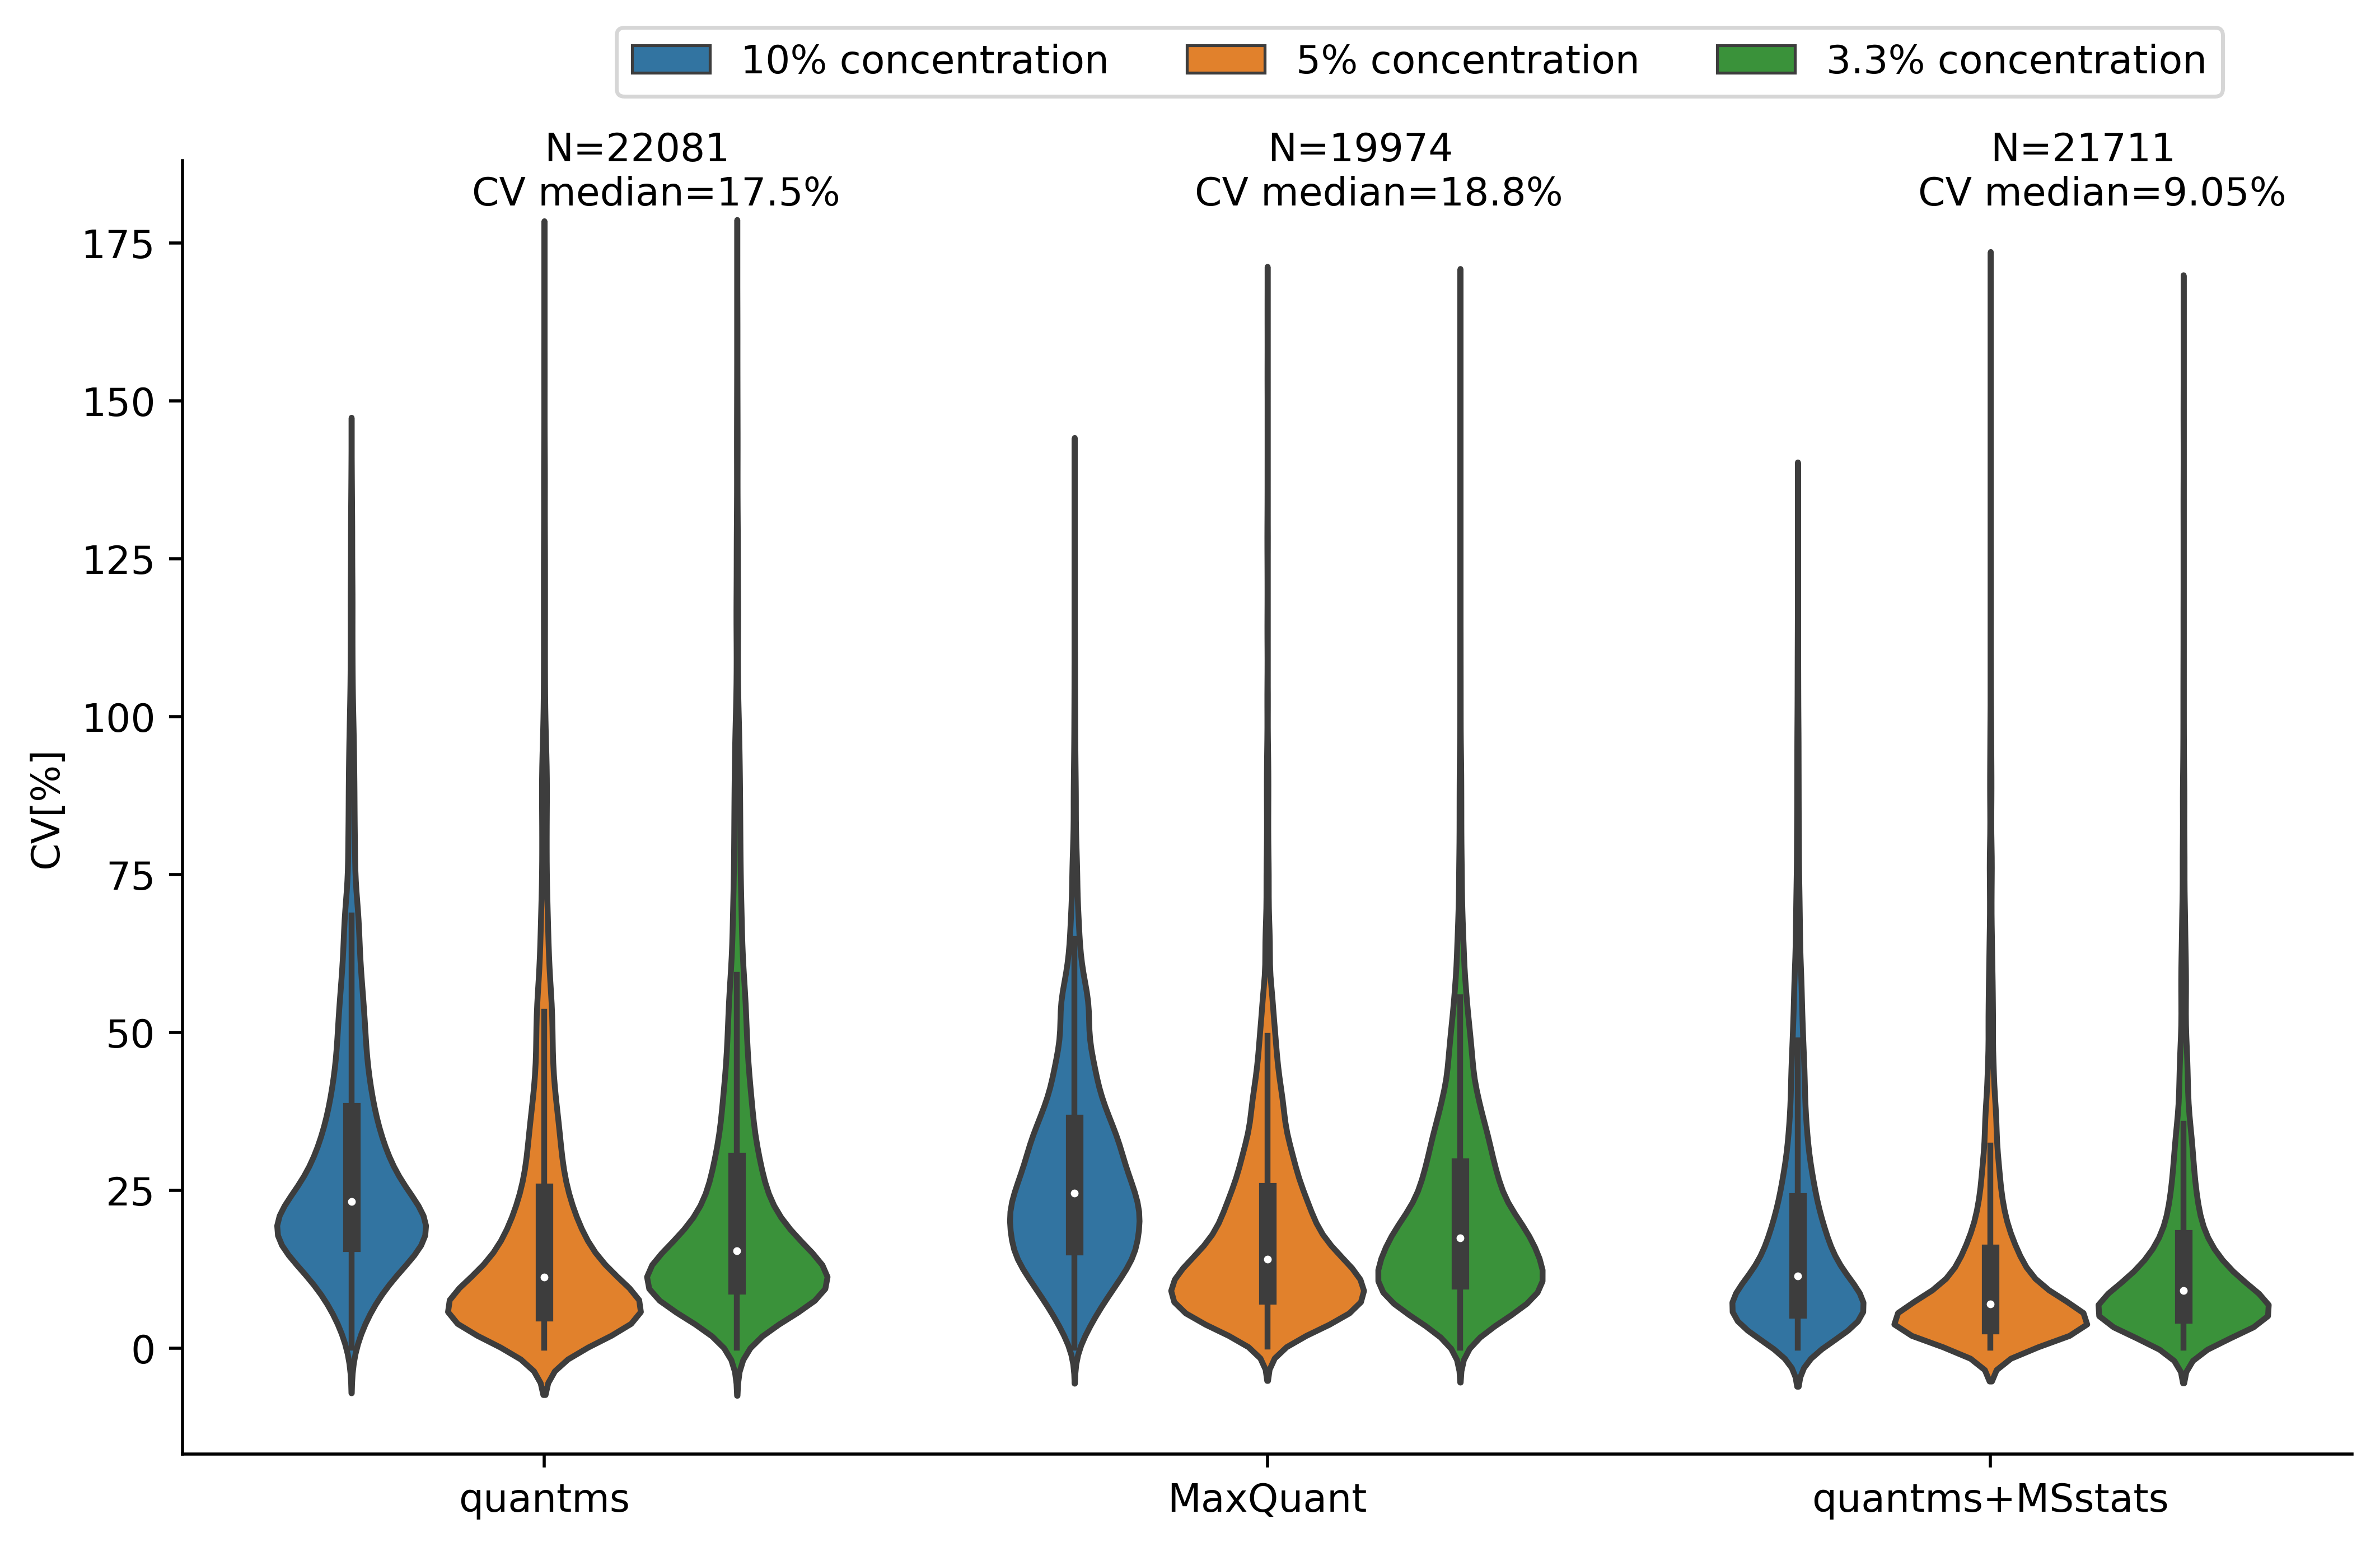

In [76]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=["quantms", "MaxQuant", "quantms+MSstats"], ordered=True)
lfq_cv_pic["tool"] = lfq_cv_pic["tool"].astype(cat_type)
# lfq_cv_pic["Condition"] = lfq_cv_pic["Condition"] + " concentration"

plt.figure(figsize=(10,6),dpi=500)
ax = sns.violinplot(data=lfq_cv_pic, x="tool", y="CV[%]", hue="Condition")
ax.set_xlabel("")
ax.get_legend().remove()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = (0.2,1.05), ncol=3)

ax.text(0,188,"N=" + "22081")
ax.text(-0.1,181,"CV median=" + "17.5%")

ax.text(1,188,"N=" + "19974")
ax.text(0.9,181,"CV median=" + "18.8%")

ax.text(2,188,"N=" + "21711")
ax.text(1.9,181,"CV median=" + "9.05%")

plt.savefig("lfqcv.png", dpi=500)

In [59]:
print(lfq_cv_pic.groupby("tool")["CV[%]"].median())
print(lfq_cv_pic.groupby("tool")["ProteinName"].size())

tool
quantms            17.589835
MaxQuant           18.801078
quantms+MSstats     9.055691
Name: CV[%], dtype: float64
tool
quantms            22081
MaxQuant           19974
quantms+MSstats    21711
Name: ProteinName, dtype: int64


# TMT analysis

In [77]:
t_data = pd.DataFrame(None,columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4', 'Condition', "CV[%]", "Species"])


for condition in np.unique(quantms_tmt['Condition']):
    
    quantms_tmt_condition = quantms_tmt[quantms_tmt['Condition'] == condition]

    for protein in np.unique(quantms_tmt_condition['ProteinName']):
        t = quantms_tmt_condition[quantms_tmt_condition['ProteinName'] == protein]
        BioRep1 = 0
        BioRep2 = 0
        BioRep3 = 0
        BioRep4 = 0
        # sum intensity across fraction
        if condition == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house":
            
            BioRep1 = np.sum(t[t['Channel'].isin([i for i in [1]])]['Intensity'])
            BioRep2 = np.sum(t[t['Channel'].isin([i for i in [2]])]['Intensity'])
            BioRep3 = np.sum(t[t['Channel'].isin([i for i in [3]])]['Intensity'])
            BioRep4 = np.NaN
            
        elif condition == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house":
            BioRep1 = np.sum(t[t['Channel'].isin([i for i in [4]])]['Intensity'])
            BioRep2 = np.sum(t[t['Channel'].isin([i for i in [5]])]['Intensity'])
            BioRep3 = np.sum(t[t['Channel'].isin([i for i in [6]])]['Intensity'])
            BioRep4 = np.sum(t[t['Channel'].isin([i for i in [7]])]['Intensity'])
            
        else:
            BioRep1 = np.sum(t[t['Channel'].isin([i for i in [8]])]['Intensity'])
            BioRep2 = np.sum(t[t['Channel'].isin([i for i in [9]])]['Intensity'])
            BioRep3 = np.sum(t[t['Channel'].isin([i for i in [10]])]['Intensity'])
            BioRep4 = np.sum(t[t['Channel'].isin([i for i in [11]])]['Intensity'])
        
        species = "Human" if "HUMAN" in protein else "Yeast"
        if BioRep1 == 0:
            BioRep1 = np.NaN
        if BioRep2 == 0:
            BioRep2 = np.NaN
        if BioRep3 == 0:
            BioRep3 = np.NaN
        if BioRep4 == 0:
            BioRep4 = np.NaN
            
        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4])
        t_data = t_data.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, 'BioRep4': BioRep4,
                       'Condition': condition, "CV[%]": 100 * (std / mean), "Species": species}, ignore_index=True)

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\numpy\lib\nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [78]:
quantms_tmt_pic = pd.DataFrame(None, columns=["ProteinName", "Log2FC", "Species"])

# 2-fold change
for prot, group in t_data.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3"]]
    else:
        continue
    if t10.isnull().sum(axis=1).values[0] >=2 or t5.isnull().sum(axis=1).values[0] >=2:
        continue

    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t5, axis=1)[0])
    quantms_tmt_pic = quantms_tmt_pic.append({"ProteinName":prot, "Log2FC": log2ratio, 
                                              "Species": group["Species"].values[0], "type":"2-fold change"}, ignore_index=True)
# 1.5 fold change
for prot, group in t_data.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if t5.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue
    
    log2ratio = np.log2(np.nanmean(t5, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    quantms_tmt_pic = quantms_tmt_pic.append({"ProteinName":prot, "Log2FC": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "1.5-fold change"}, ignore_index=True)
    
# 3 fold change
for prot, group in t_data.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3"]]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][["BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
    else:
        continue
    if t10.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue

    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    quantms_tmt_pic = quantms_tmt_pic.append({"ProteinName":prot, "Log2FC": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "3-fold change"}, ignore_index=True)

In [79]:
quantms_tmt_pic["tool"] = "quantms"

### Running with MSstatsTMT

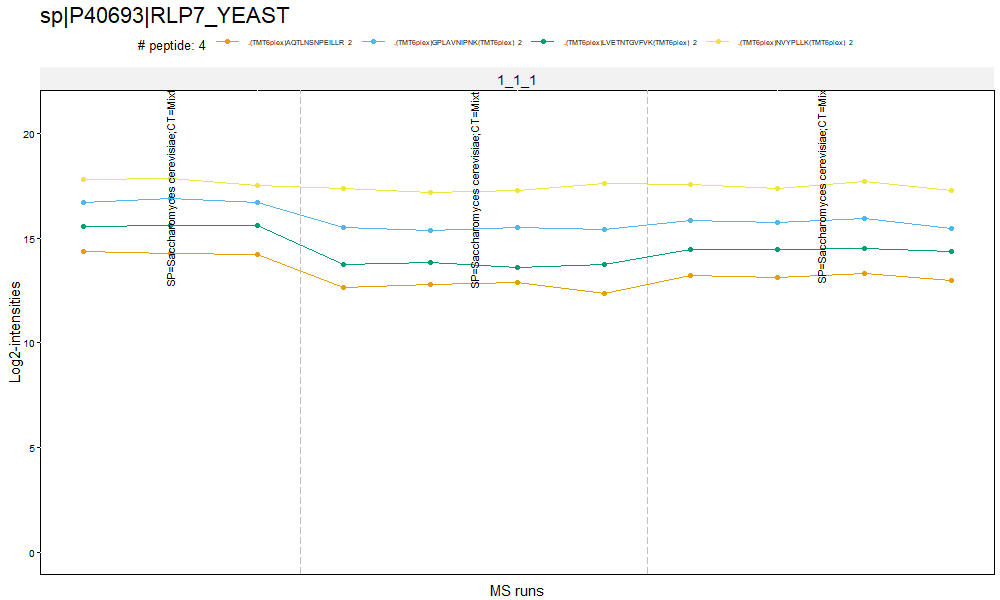

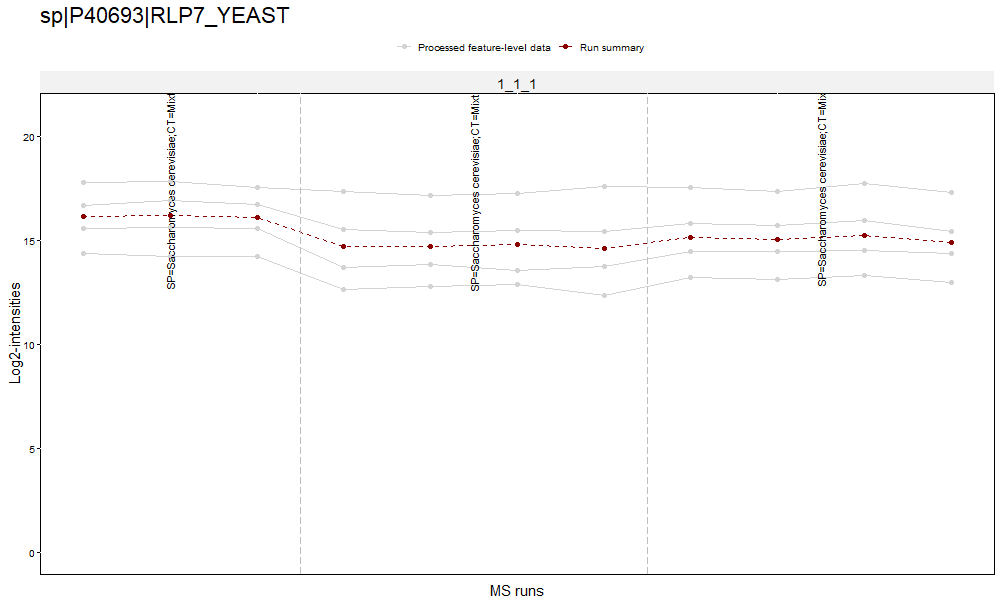

In [101]:
%%R -w 1000 -h 600

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
library("dplyr")

openms_tmt_output = './TMTResults/quantms/PXD007683-TMT.sdrf_openms_design_msstats_in.csv'
raw.om = read.csv(openms_tmt_output, header = TRUE, sep = ',')
raw.om = raw.om[!grepl("DECOY", raw.om$ProteinName),]
input.om <- OpenMStoMSstatsTMTFormat(raw.om)

# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

## Profile plot without norm channnels and empty channels
dataProcessPlotsTMT(data=quant_om.msstats,
                     type = 'ProfilePlot',
                     which.Protein = 'sp|P40693|RLP7_YEAST',  # spiked-in protein
                     width = 25, # adjust the figure width 
                     height = 12,
                     address=FALSE)

write.csv(quant_om.msstats$ProteinLevelData, "./TMTResults/quantms/ProteinLevelData1.csv", row.names=FALSE, col.names=TRUE,sep=",")

In [103]:
%%R -w 1000 -h 600

Comp1<-matrix(c(1,0,-1),nrow=1)
Comp2<-matrix(c(1,-1,0),nrow=1)
Comp3<-matrix(c(0,-1,1),nrow=1)
Comp <- rbind(Comp1, Comp2, Comp3)

row.names(Comp)<-c("10vs5", "10vs3", "5vs3")
colnames(Comp) = c("SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house","SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house","SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house")

Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = Comp, moderated=TRUE)

TMT_Comp = Comp.pairwise$ComparisonResult
write.table(TMT_Comp,"./TMTResults/quantms/Comparison_results1.csv",row.names=FALSE,col.names=TRUE,sep=",")

In [104]:
tmt_compar_res = pd.read_csv("./TMTResults/quantms/Comparison_results1.csv", sep=',', header=0)
tmt_compar_res = tmt_compar_res[["Protein", "log2FC", "adj.pvalue", "pvalue", "Label"]]
tmt_compar_res.dropna(how="any", axis=0, inplace=True)
tmt_compar_res["Species"] = tmt_compar_res.apply(lambda x: "Human" if "HUMAN" in x["Protein"] else "Yeast", axis=1)
def convert_label(label):
    if label == "10vs5":
        return "2-fold change"
    elif label == "10vs3":
        return "3-fold change"
    else:
        return "1.5-fold change"
tmt_compar_res["Label"] = tmt_compar_res.apply(lambda x: convert_label(x["Label"]), axis=1)
tmt_compar_res["tool"] = "quantms+MSstatsTMT"
tmt_msstats_pic = tmt_compar_res[["Protein", "log2FC", "Label", "Species", "tool"]]

In [81]:
quantms_tmt_expressioin = pd.read_csv("./TMTResults/quantms/ProteinLevelData1.csv", sep=',', index_col=None)

def Channel_Con(Channel):
    if Channel == 1 or Channel == 4 or Channel == 8:
        return "BioRep1"
    elif Channel == 2 or Channel == 5 or Channel == 9:
        return "BioRep2"
    elif Channel == 3 or Channel == 6 or Channel == 10:
        return "BioRep3"
    else:
        return "BioRep4"
    
quantms_tmt_expressioin["Intensities"] = 2**quantms_tmt_expressioin["Abundance"]    
quantms_tmt_expressioin["BioRep"] = quantms_tmt_expressioin.apply(lambda x: BioRep_Con(x["Channel"]), axis=1)

quantms_tmt_cv_pic = quantms_tmt_expressioin.pivot_table(index=["Protein","Condition"], columns="BioRep", values="Intensities").reset_index()
quantms_tmt_cv_pic = quantms_tmt_cv_pic[["Protein", "Condition", "BioRep1", "BioRep2", "BioRep3", "BioRep4"]]
quantms_tmt_cv_pic.rename(columns={"Protein": "ProteinName"}, inplace=True)
quantms_tmt_cv_pic["Species"] = quantms_tmt_cv_pic.apply(lambda x: "Human" if "HUMAN" in x["ProteinName"] else "Yeast", axis=1)
quantms_tmt_cv_pic['CV[%]'] = quantms_tmt_cv_pic.apply(lambda x: np.nanstd(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) / np.nanmean(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) * 100, axis=1)
quantms_tmt_cv_pic["tool"] = "quantms+MSstatsTMT"

### MaxQuant TMT

In [82]:
MaxQuant_TMT_pic = pd.DataFrame()

MaxquantTMT_10 = MaxquantTMT[['Protein IDs','Reporter intensity 1', 'Reporter intensity 2', 'Reporter intensity 3']]
MaxquantTMT_10.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3']
MaxquantTMT_10["BioRep4"] = np.NaN
MaxquantTMT_10['Condition'] = "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"

MaxquantTMT_5 = MaxquantTMT[['Protein IDs','Reporter intensity 4', 'Reporter intensity 5', 'Reporter intensity 6', 'Reporter intensity 7']]
MaxquantTMT_5.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4']
MaxquantTMT_5['Condition'] = "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"

MaxquantTMT_3 = MaxquantTMT[['Protein IDs','Reporter intensity 8', 'Reporter intensity 9', 'Reporter intensity 10', 'Reporter intensity 11']]
MaxquantTMT_3.columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4']
MaxquantTMT_3['Condition'] = "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"

MaxQuant_TMT_pic = MaxQuant_TMT_pic.append(MaxquantTMT_10, ignore_index=True).append(MaxquantTMT_5, ignore_index=True).append(MaxquantTMT_3, ignore_index=True)
MaxQuant_TMT_pic['Species'] = MaxQuant_TMT_pic.apply(lambda x: "Human" if "HUMAN" in x["ProteinName"] else "Yeast", axis=1)
MaxQuant_TMT_pic.replace(0, np.NaN, inplace=True)
MaxQuant_TMT_pic.dropna(subset=['BioRep1','BioRep2', 'BioRep3', 'BioRep4'], thresh=2, inplace=True)


MaxQuant_TMT_pic['CV[%]'] = MaxQuant_TMT_pic.apply(lambda x: np.nanstd(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) / np.nanmean(x[['BioRep1','BioRep2', 'BioRep3', 'BioRep4']].tolist()) * 100, axis=1)

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [83]:
MSstatsTMT_fc_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Species"])

# 2-fold change
for prot, group in MaxQuant_TMT_pic.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1",'BioRep2', 'BioRep3']]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][['BioRep1','BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
    
    if t10.isnull().sum(axis=1).values[0] >=2 or t5.isnull().sum(axis=1).values[0] >=2:
        continue
        
    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t5, axis=1)[0])
    MSstatsTMT_fc_pic = MSstatsTMT_fc_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "2-fold change"}, ignore_index=True)

# 3-fold change
for prot, group in MaxQuant_TMT_pic.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house" in group["Condition"].values:
        t10 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=10%;CV=in-house"][["BioRep1",'BioRep2', 'BioRep3']]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][['BioRep1','BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
        
    if t10.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue
        
    log2ratio = np.log2(np.nanmean(t10, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    MSstatsTMT_fc_pic = MSstatsTMT_fc_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "3-fold change"}, ignore_index=True)
    
# 3-fold change
for prot, group in MaxQuant_TMT_pic.groupby("ProteinName"):
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house" in group["Condition"].values:
        t5 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=5%;CV=in-house"][["BioRep1",'BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
    if "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house" in group["Condition"].values:
        t3 = group[group['Condition'] == "SP=Saccharomyces cerevisiae;CT=Mixture;QY=3.3%;CV=in-house"][['BioRep1','BioRep2', 'BioRep3', 'BioRep4']]
    else:
        continue
        
    if t5.isnull().sum(axis=1).values[0] >=2 or t3.isnull().sum(axis=1).values[0] >=2:
        continue
        
    log2ratio = np.log2(np.nanmean(t5, axis=1)[0] / np.nanmean(t3, axis=1)[0])
    MSstatsTMT_fc_pic = MSstatsTMT_fc_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio,
                                                       "Species": group["Species"].values[0], "type": "1.5-fold change"}, ignore_index=True)

In [105]:
# MSstatsTMT_fc_pic.rename(columns={"Log2(ratio)": "Log2FC", "type": "Label"}, inplace=True)
# MSstatsTMT_fc_pic["tool"] = "MaxQuant"
tmt_msstats_pic.rename(columns={"Protein": "ProteinName", "log2FC": "Log2FC"}, inplace=True)
# quantms_tmt_pic.rename(columns={"type": "Label"}, inplace=True)
TMT_total_pic = quantms_tmt_pic.append(MSstatsTMT_fc_pic, ignore_index=True).append(tmt_msstats_pic, ignore_index=True)

C:\Users\ChengXin\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [106]:
TMT_total_pic.head()

,ProteinName,Log2FC,Species,Label,tool
0,sp|A0A075B767|PAL4H_HUMAN;sp|A0A0B4J2A2|PAL4C_...,-0.064309,Human,2-fold change,quantms
1,sp|A0A096LP01|SIM26_HUMAN,-0.323175,Human,2-fold change,quantms
2,sp|A0A096LP55|QCR6L_HUMAN;sp|P07919|QCR6_HUMAN,-0.240706,Human,2-fold change,quantms
3,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,-0.132606,Human,2-fold change,quantms
4,sp|A0A0B4J2F0|PIOS1_HUMAN,-0.192197,Human,2-fold change,quantms


9409
                              Log2FC
Species tool                        
Human   MaxQuant            0.096472
        quantms             0.095044
        quantms+MSstatsTMT -0.044077
Yeast   MaxQuant            0.574935
        quantms             0.541365
        quantms+MSstatsTMT  0.405231
Species  tool              
Human    MaxQuant              7249
         quantms               7949
         quantms+MSstatsTMT    7952
Yeast    MaxQuant              1235
         quantms               1460
         quantms+MSstatsTMT    1462
dtype: int64
0.098
1.5151515151515151
                              Log2FC
Species tool                        
Human   MaxQuant            0.096472
        quantms             0.095044
        quantms+MSstatsTMT -0.044077
Yeast   MaxQuant            0.574935
        quantms             0.541365
        quantms+MSstatsTMT  0.405231
Species  tool              
Human    MaxQuant              7249
         quantms               7949
         quantms+MSst

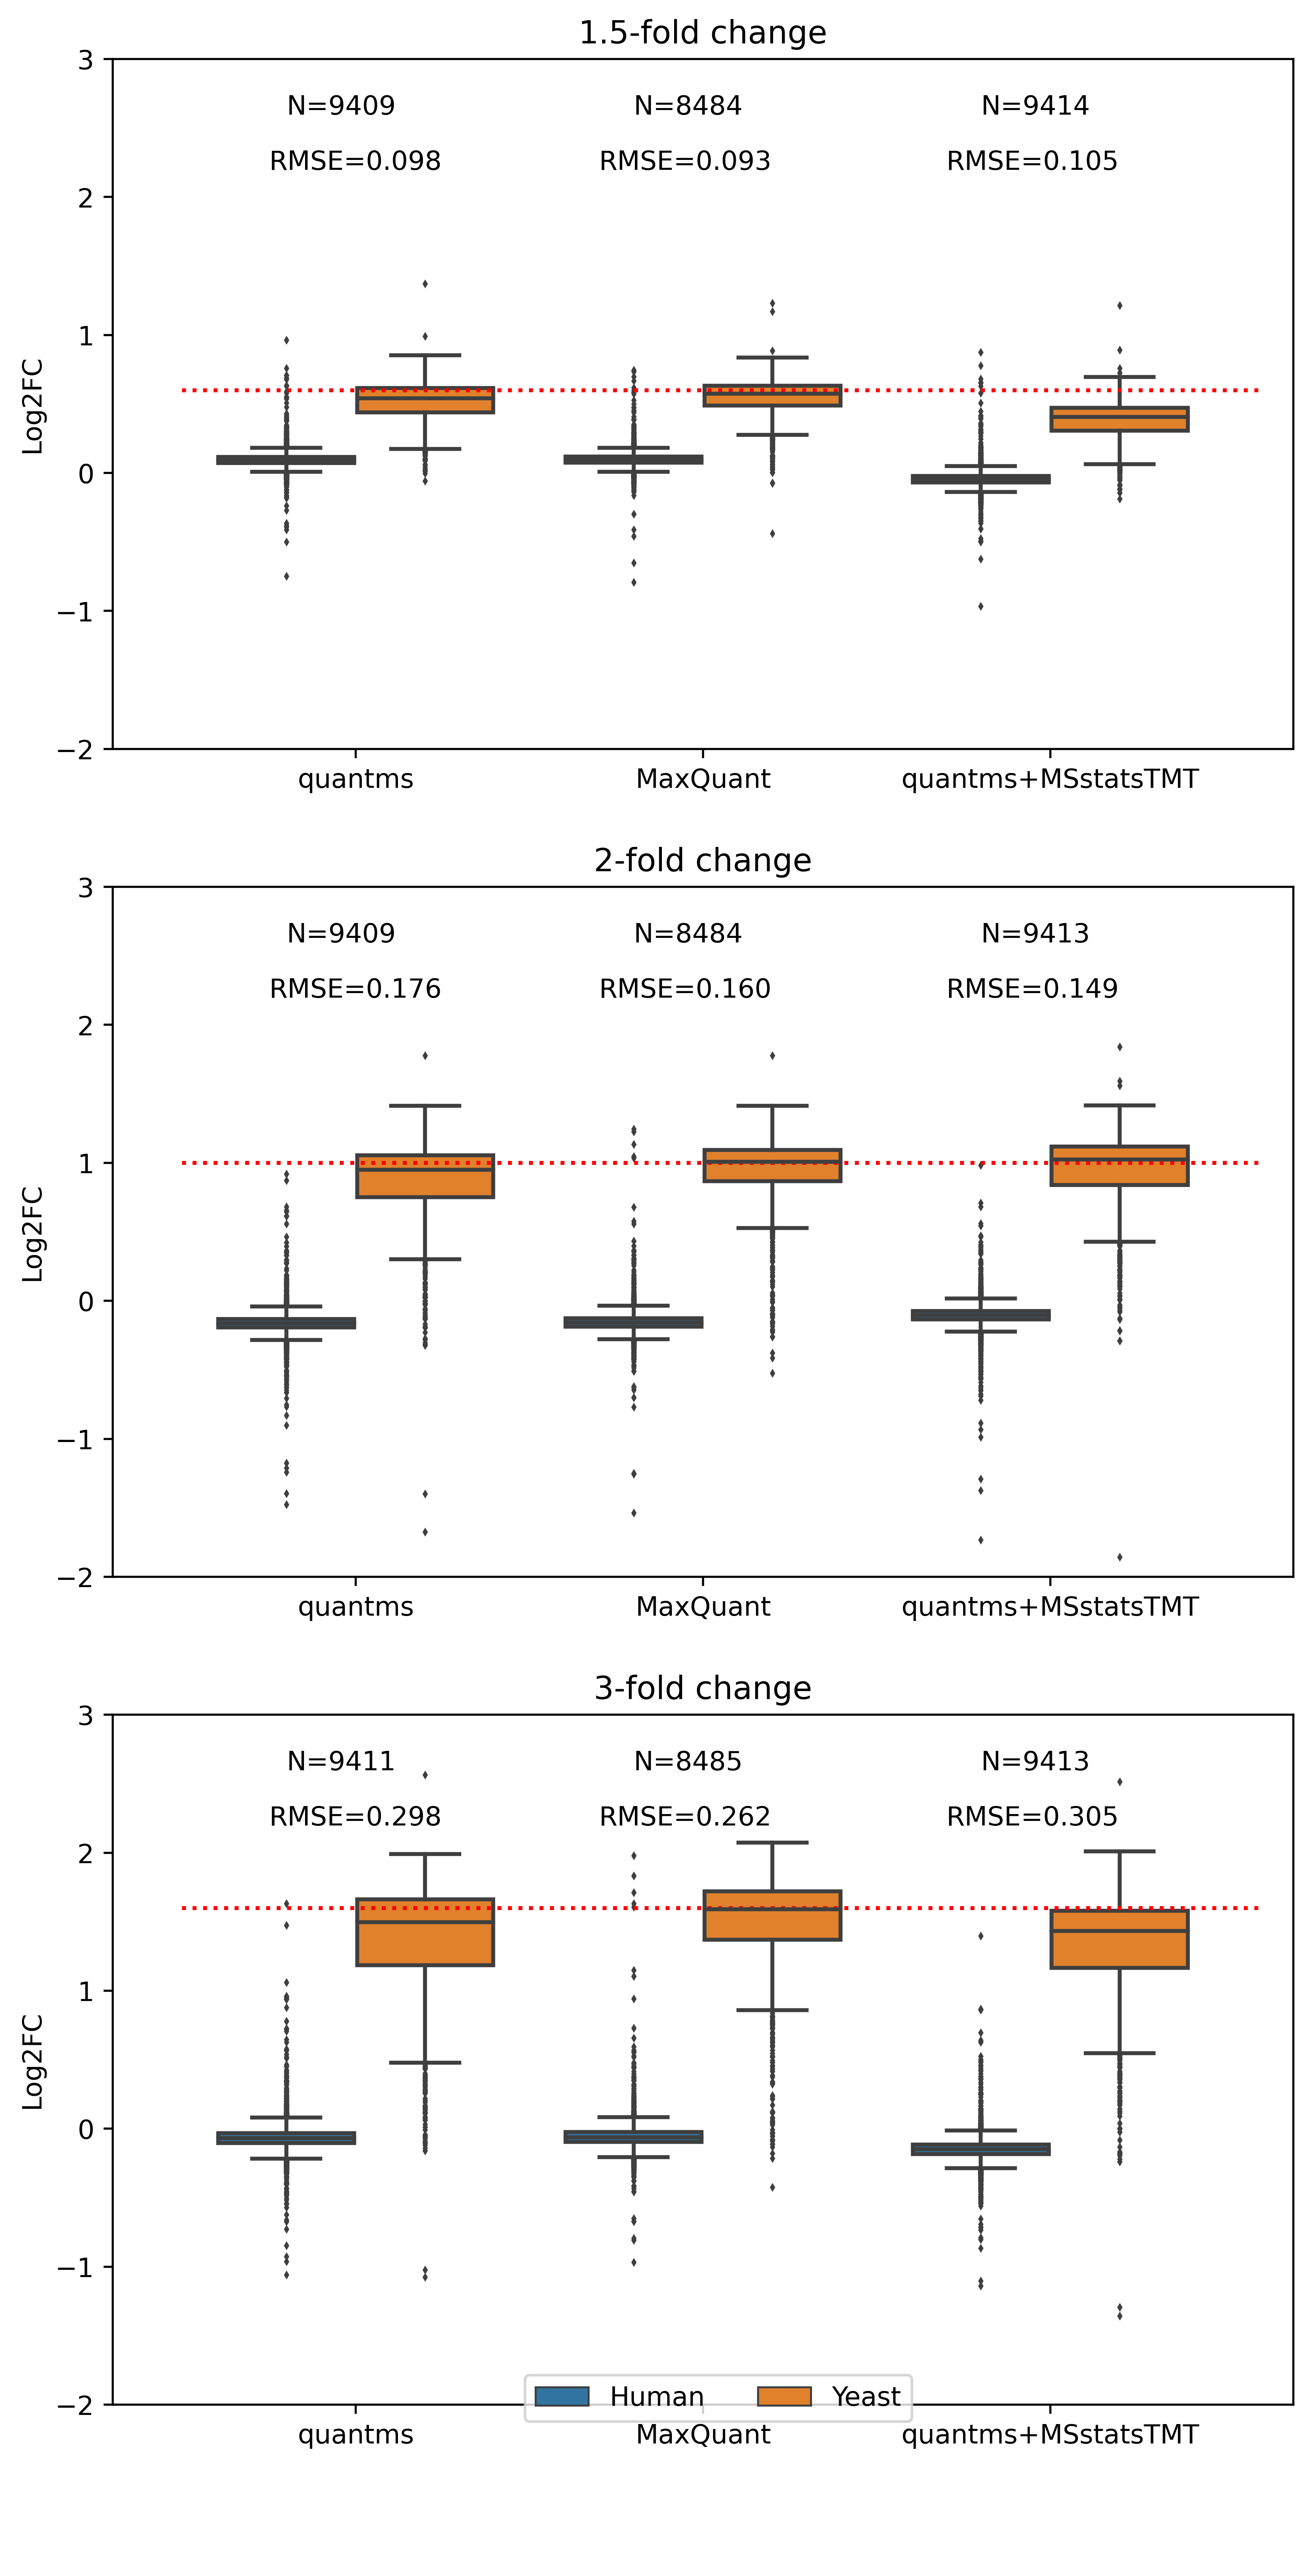

In [116]:
fig, ax= plt.subplots(figsize=(8,16),nrows=3, ncols=1, dpi=500)
i = 0

def cal_RMSE(r, c):
    if r["Species"] == "Human":
        rel = 1
    else:
        rel = c
    bias = (2**r["Log2FC"] - rel)**2
    return bias

for c,g in TMT_total_pic.groupby("Label"):
    RD = pd.DataFrame()
    sns.boxplot(data=g, x="tool", hue="Species", y="Log2FC", ax=ax[i], fliersize=1)
    ax[i].get_legend().remove()
    ax[i].set_ylim(-2,3)
    ax[i].set_title(c)
    ax[i].set_xlabel("")
    if c == "1.5-fold change":
        ax[i].hlines(y=np.log2(5/3.3), xmin=-0.5, xmax=2.6, color="red", linestyle="dotted")
        c = 5/3.3
    elif c == "3-fold change":
        ax[i].hlines(y=np.log2(10/3.3), xmin=-0.5, xmax=2.6, color="red", linestyle="dotted")
        c= 10/3.3
    else:
        ax[i].hlines(y=np.log2(10/5), xmin=-0.5, xmax=2.6, color="red", linestyle="dotted")
        c = 10/5
    
    RD["bias"] = g[g["tool"] == "quantms"].apply(lambda row: cal_RMSE(row, c), axis=1)
    RMSE = format((np.sum(RD["bias"]) / RD.size)**0.5,".3f")
    print(RD.size)
    print(g.groupby(["Species", "tool"]).median())
    print(g.groupby(["Species", "tool"]).size())
    print(RMSE)
    ax[i].text(-0.2, 2.6, "N=" + str(RD.size))
    ax[i].text(-0.25,2.2, "RMSE=" + str(RMSE))
    
    RD = pd.DataFrame()
    RD["bias"] = g[g["tool"] == "MaxQuant"].apply(lambda row: cal_RMSE(row, c), axis=1)
    RD.to_csv("RD" + str(c) + ".csv", index=None)
    RMSE = format((np.sum(RD["bias"]) / RD.size)**0.5,".3f")
    ax[i].text(0.8,2.6,"N=" + str(RD.size))
    ax[i].text(0.7,2.2,"RMSE=" + str(RMSE))
    
    RD = pd.DataFrame()
    RD["bias"] = g[g["tool"] == "quantms+MSstatsTMT"].apply(lambda row: cal_RMSE(row, c), axis=1)
    RMSE = format((np.sum(RD["bias"]) / RD.size)**0.5,".3f")
    ax[i].text(1.8,2.6,"N=" + str(RD.size))
    ax[i].text(1.7,2.2,"RMSE=" + str(RMSE))
    
    i +=1
    print(c)
    print(g.groupby(["Species", "tool"]).median())
    print(g.groupby(["Species", "tool"]).size())

lines, labels = ax[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = (0.4,0.06), ncol=2)
plt.savefig("tmtfc.png", dpi=500)

In [122]:
MaxQuant_TMT_pic["tool"] = "MaxQuant"
t_data["tool"] = "quantms"
tmt_cv_pic = MaxQuant_TMT_pic.append(quantms_tmt_cv_pic, ignore_index=True).append(t_data, ignore_index=True)

tmt_cv_pic.dropna(subset=["BioRep1","BioRep2","BioRep3","BioRep4"], thresh=2, inplace=True)
tmt_cv_pic["Condition"] = tmt_cv_pic.apply(lambda x: x["Condition"].split(";")[2].split("=")[-1], axis=1)

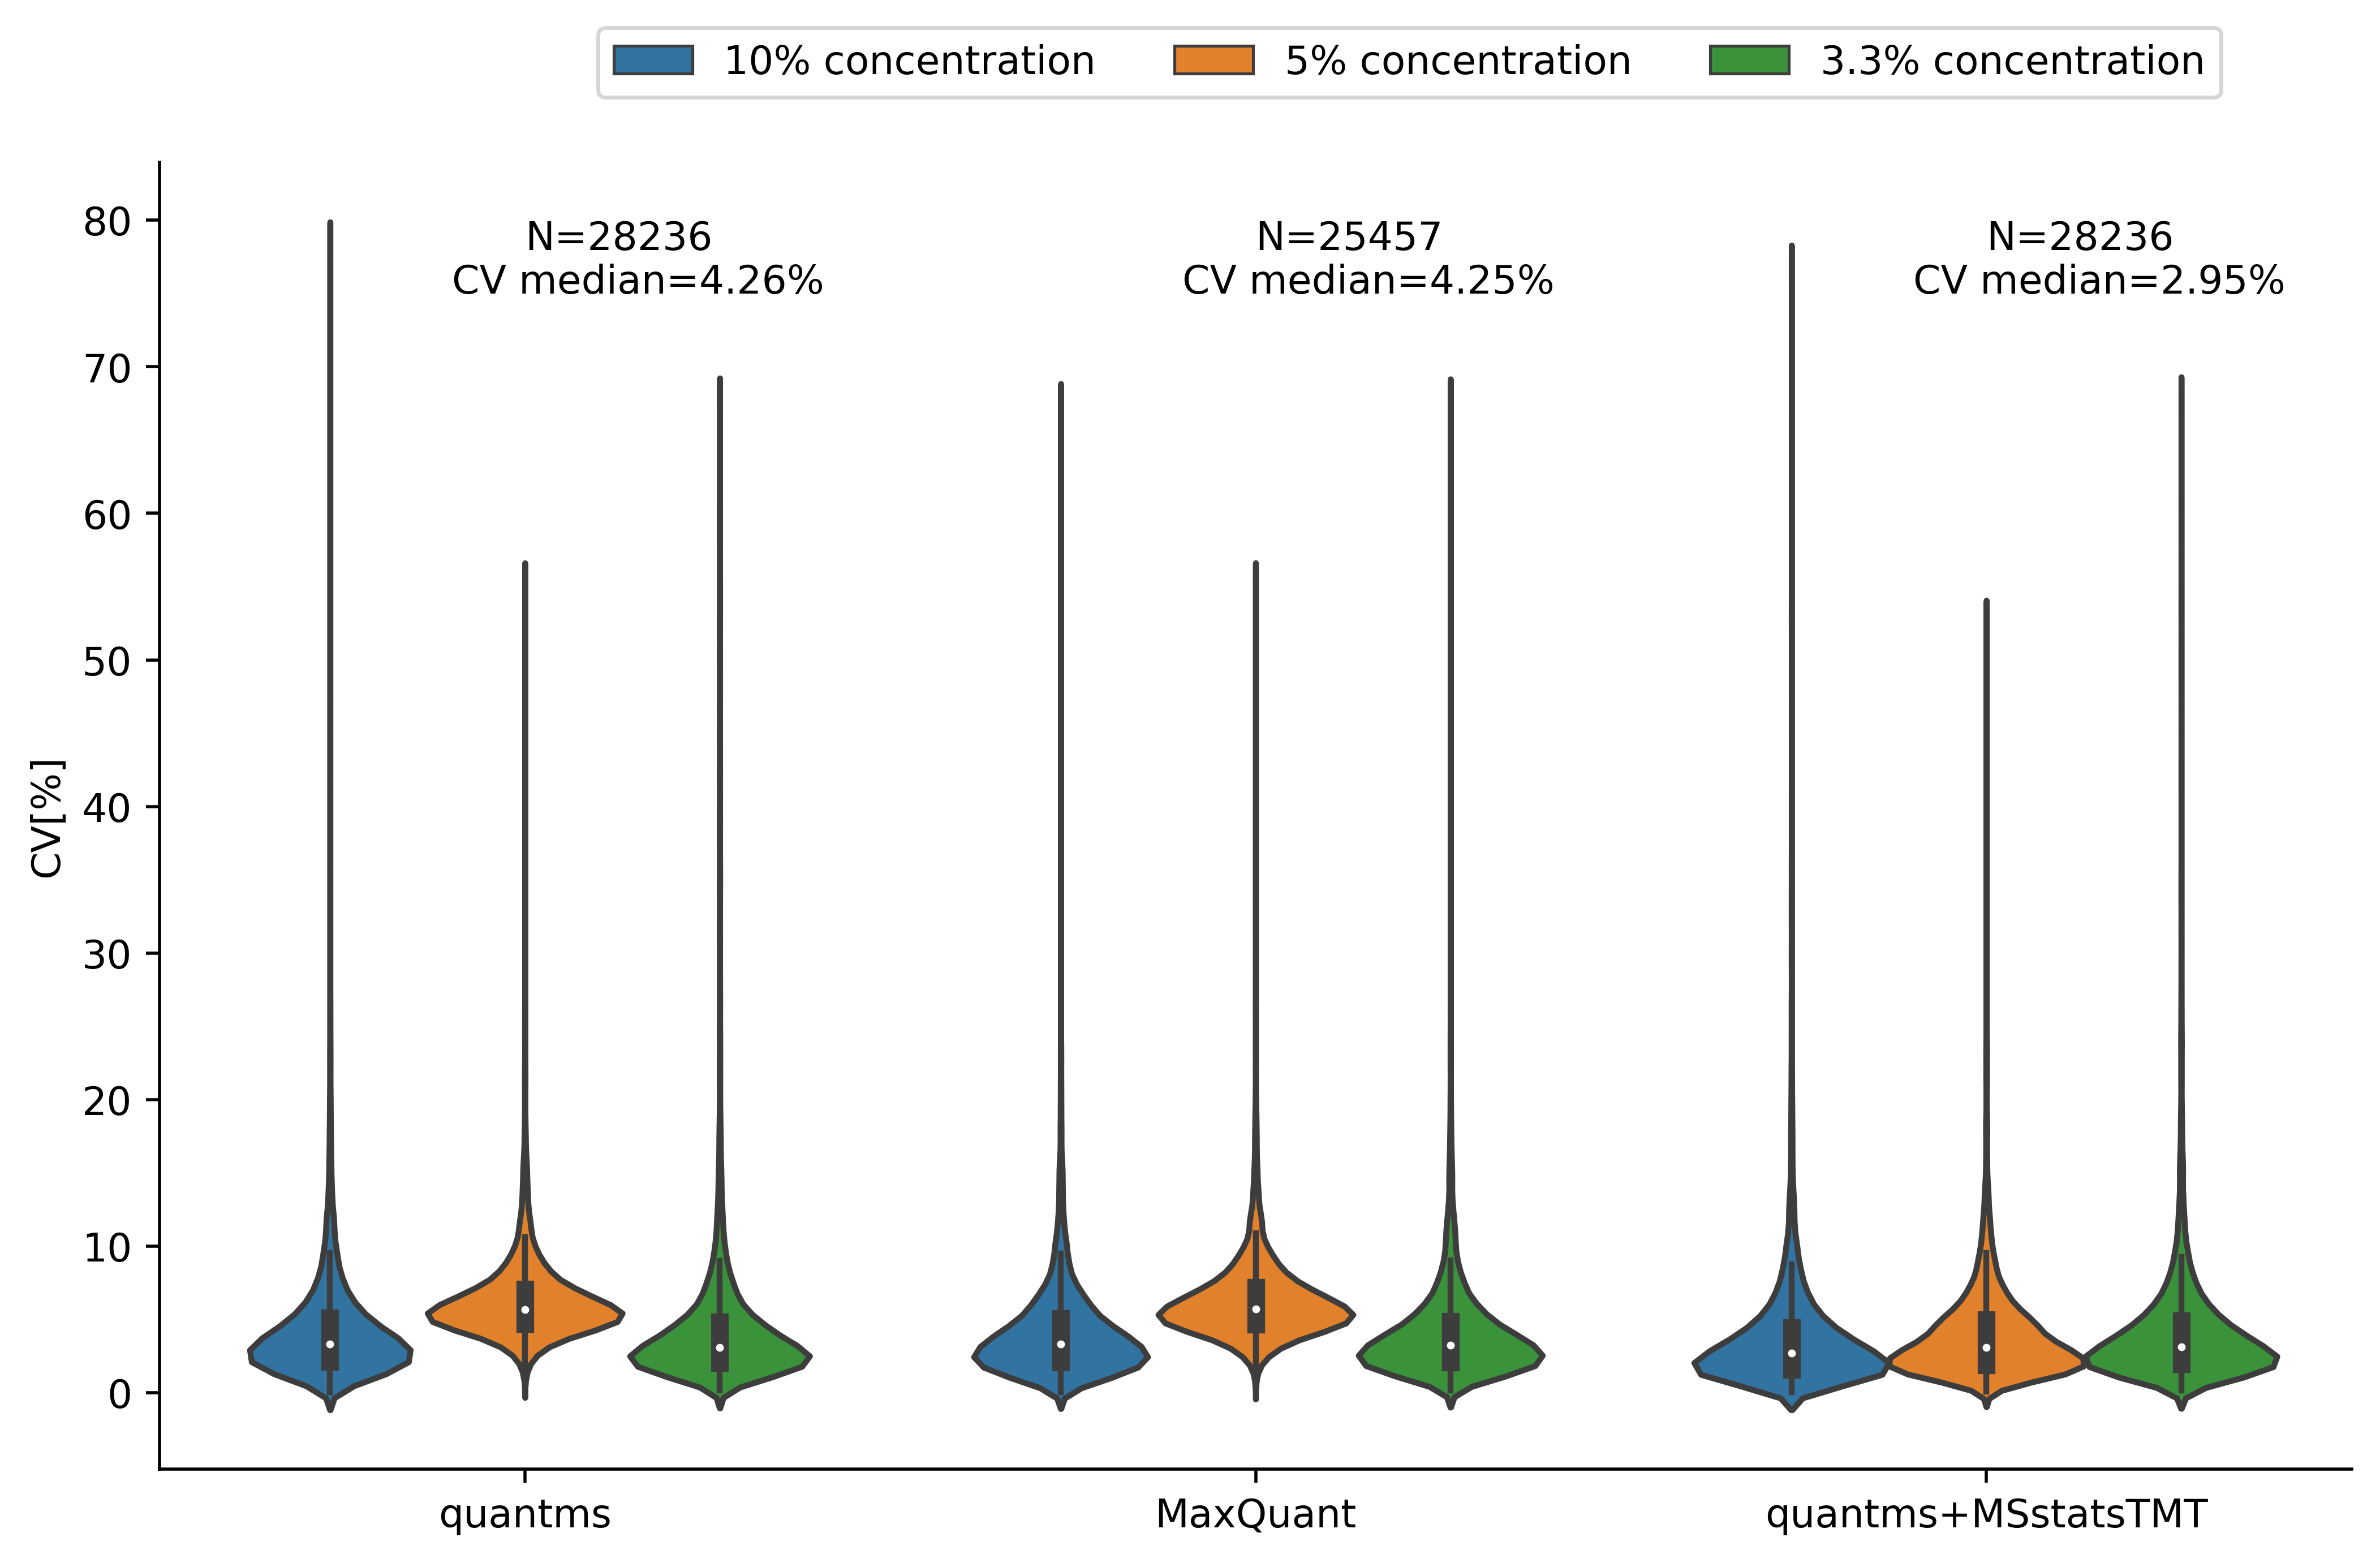

In [123]:
cat_type = CategoricalDtype(categories=["quantms", "MaxQuant", "quantms+MSstatsTMT"], ordered=True)
tmt_cv_pic["tool"] = tmt_cv_pic["tool"].astype(cat_type)
tmt_cv_pic["Condition"] = tmt_cv_pic["Condition"] + " concentration"

plt.figure(figsize=(10,6),dpi=500)
ax = sns.violinplot(data=tmt_cv_pic, x="tool", y="CV[%]", hue="Condition")
plt.xlabel("")

ax.get_legend().remove()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = (0.2,1.05), ncol=3)

ax.text(0,78,"N=" + "28236")
ax.text(-0.1,75,"CV median=" + "4.26%")

ax.text(1,78,"N=" + "25457")
ax.text(0.9,75,"CV median=" + "4.25%")

ax.text(2,78,"N=" + "28236")
ax.text(1.9,75,"CV median=" + "2.95%")

plt.savefig("tmtcv.png", dpi=500)


In [120]:
print(tmt_cv_pic.groupby("tool")["CV[%]"].median())
print(tmt_cv_pic.groupby("tool")["ProteinName"].size())

tool
quantms               4.269011
MaxQuant              4.259328
quantms+MSstatsTMT    2.959565
Name: CV[%], dtype: float64
tool
quantms               28236
MaxQuant              25457
quantms+MSstatsTMT    28236
Name: ProteinName, dtype: int64
